In [1]:
import numpy as np
from IPython.display import Image as img

## Creating a numpy array:

In [2]:
x = np.array([10,20,30])
x.shape

(3,)

### other way of creating:

In [3]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
## Converting to 3x3 matrix:
y= x.reshape((3,3))
y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [5]:
y.shape

(3, 3)

## Accessing elements in an array:

In [6]:
## Access a row completely based on position:

y[0,:] ## first row all columns

array([0, 1, 2])

In [7]:
## first col all rows:

y[:,0]

array([0, 3, 6])

### we can specify starting and ending index also:

In [8]:
y[0:2,:] ## first 2 rows all cols

array([[0, 1, 2],
       [3, 4, 5]])

### If you want a specific position give it in a tuple:

In [9]:
y[:,(0,2)] ## all rows, 1st and 3rd column

array([[0, 2],
       [3, 5],
       [6, 8]])

## Let's read odi dataset:

In [10]:
import pandas as pd
odi = pd.read_csv('odi-batting.csv')
odi.shape

(55926, 8)

In [11]:
## gettin col names in pandas dataframe:
odi.columns

Index(['Country', 'Player', 'Runs', 'ScoreRate', 'MatchDate', 'Ground',
       'Versus', 'URL'],
      dtype='object')

### Getting only numerical col names:

In [12]:
odi.describe().columns  ## Since describe takes only numerical cols; .columns on describe will give only numerical col names

Index(['Runs', 'ScoreRate'], dtype='object')

In [13]:
## Another way:

odi._get_numeric_data().columns

## any function which starts with _ is an inbuilt function and we are not supposed to use that
## Because inbuilt functions might change their behaviour across versions

Index(['Runs', 'ScoreRate'], dtype='object')

- All col names are available in list like structure

### Getting non-numerical column names:

In [14]:
odi.describe(include='object').columns

Index(['Country', 'Player', 'MatchDate', 'Ground', 'Versus', 'URL'], dtype='object')

In [15]:
## Another way is using numpy:

all_columns = odi.columns ## All col names
num_columns = odi.describe().columns ## Numerical col names
non_num_columns = np.setdiff1d(all_columns,num_columns)
non_num_columns

array(['Country', 'Ground', 'MatchDate', 'Player', 'URL', 'Versus'],
      dtype=object)

- **setdiff1d** computes difference between two string lists
- It will take out the non common elements
- It gives one dimensional difference between two arrays
- Output will be sorted alphabetically

### How to find out this difference in plain python:

In [16]:
set(all_columns)-set(num_columns)

{'Country', 'Ground', 'MatchDate', 'Player', 'URL', 'Versus'}

In [17]:
## another way:

[i for i in all_columns if i not in num_columns]

['Country', 'Player', 'MatchDate', 'Ground', 'Versus', 'URL']

## Checkout how much time a code block takes:

In [18]:
import datetime

In [19]:
start = datetime.datetime.now() ## gives current date and time
start

datetime.datetime(2020, 5, 26, 14, 58, 30, 457501)

In [20]:
start.microsecond

457501

In [21]:
x = list(range(10000))
y = list(range(10000))

## We have to plain python list

start = datetime.datetime.now() ## taking the time before starting the operation
## x+y ---> this will not add but concatenate the list

z = [x[i]-y[i] for i in range(10000)]  ## one of the way to subtract using plain list operation

end = datetime.datetime.now() ## taking the time after ending the operation

end-start ## taking time difference to see how much time it took



datetime.timedelta(microseconds=2000)

In [22]:
## same operation we will do with numpy and see the difference in time:

x = np.arange(10000)
y = np.arange(10000) 

start = datetime.datetime.now()
z = x - y
## z[:10]
end = datetime.datetime.now()
end-start


datetime.timedelta(0)

- We can see the same operation takes very less time with arrays
- Reason being:
    - in normal pyhton list when the values gets stored they are stored at different different location. They are not stored in sequential memory locations
    - Whereas in numpy they are stored at sequential memmory location so retrieval is fast
    - The operations are optimized internally to utilize CPUs in a  better way

- timeit gives time for a single line
- The above method can be used for multiple lines

## Sorting:

In [23]:
np.random.seed(0) ## set seed to get same values everytime while generating random numbers 
x = np.random.randint(1,10,5) ## Randomly select 5 elements between 1 to 10
x

array([6, 1, 4, 4, 8])

In [24]:
np.sort(x) ## by default ascending sorting

array([1, 4, 4, 6, 8])

In [25]:
## Descending sorting:
np.sort(x)[::-1] ## shortcut in python to reverse any list like structure. Can reverse a dataframe also using this method

array([8, 6, 4, 4, 1])

## argmin(): 
- Gives the position in which we have min value

In [26]:
np.argmin(x)

1

## argmax():
- Gives the position in which we have max value:


In [27]:
np.argmax(x)

4

## argsort():

In [28]:
x.argsort()

array([1, 2, 3, 0, 4], dtype=int64)

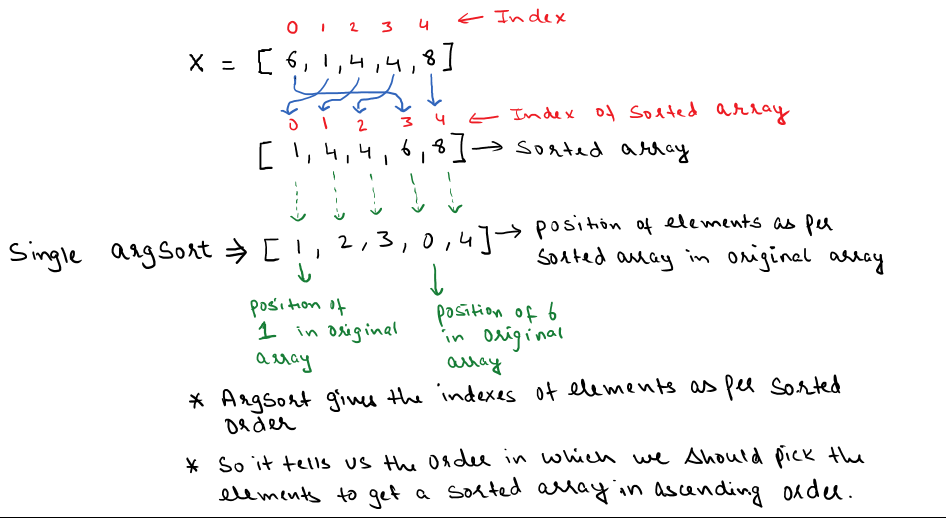

In [29]:
img('img1.png')

#### Example:

- original list ---> x = [10,1,50,2]

- sorted list ---------> [1,2,10,50]

- argsort--------------->[1,3,0,2]

## double argsort:
- double argsort gives rank:

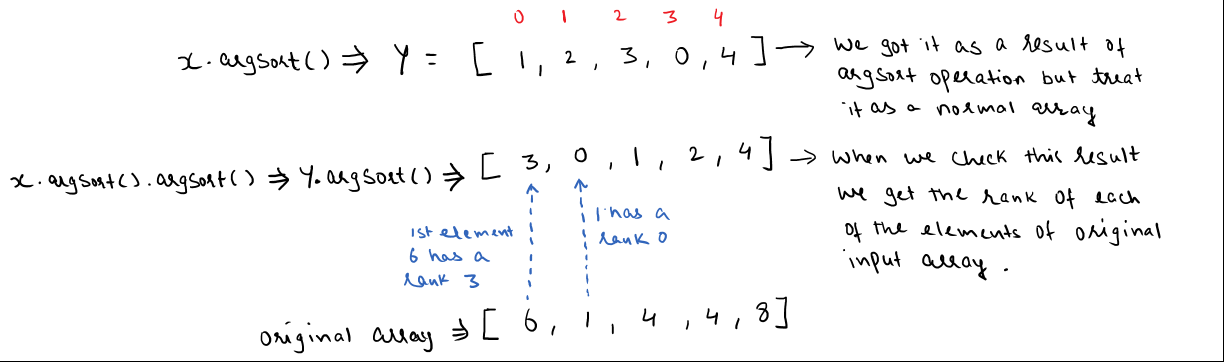

In [30]:
img('img2.png')

In [31]:
x.argsort().argsort()

array([3, 0, 1, 2, 4], dtype=int64)

# 3-D Arrays:

In [32]:
x = np.arange(8)
x

array([0, 1, 2, 3, 4, 5, 6, 7])

In [33]:
x = x.reshape(2,2,2)
x

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [34]:
x.shape

(2, 2, 2)

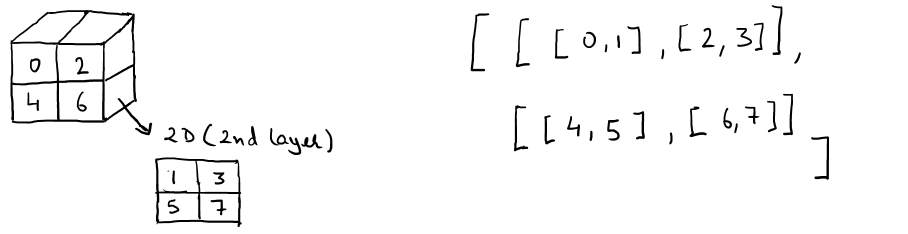

In [35]:
img('img3.png')

- We will have 2 rows, 2 cols in each dimension and total 2 dimsensions

## Slicing to get one dimension alone:

In [36]:
x[:,:,0]

array([[0, 2],
       [4, 6]])

- This is all rows and all columns in first dimension

In [37]:
x[:,:,1]

array([[1, 3],
       [5, 7]])

- This is all rows and all columns in 2nd dimension

In [38]:
x

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

- [0,1] ---> 1st row, 1st column values from all dimensions
- [2,3] ---> 1st row, 2nd column values from all dimensions
- [4,5] ---> 2nd row, 1st column values from all dimensions
- [6,7] ---> 2nd row, 2nd column values from all dimensions 

In [39]:
## creating a 3x3x3 array
## 3 rows,3cols,3 dimensions(layers):

x33 = np.arange(27).reshape((3,3,3))
x33

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

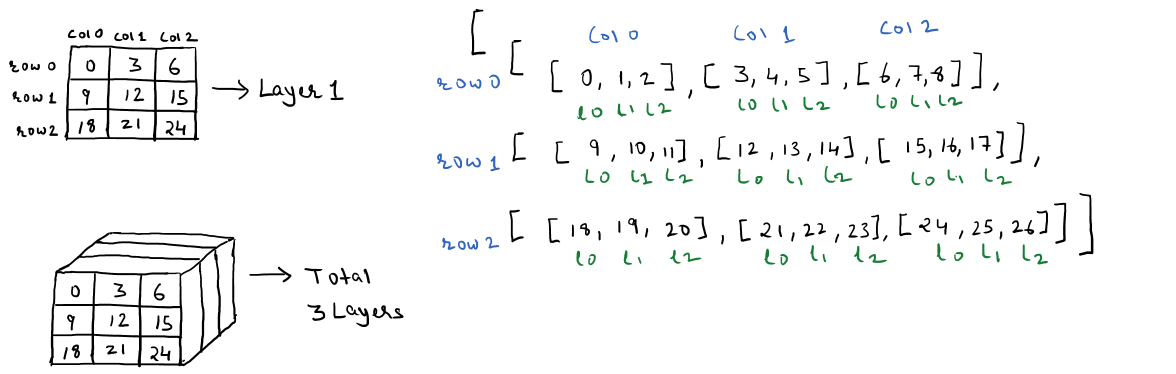

In [40]:
img('img4.png')

In [41]:
## slicing for 1st layer:

x33[:,:,0]

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [42]:
## slicing 2nd layer:

x33[:,:,1]

array([[ 1,  4,  7],
       [10, 13, 16],
       [19, 22, 25]])

In [43]:
## slicing 3rd layer:

x33[:,:,2]

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

In [44]:
## Accessing 16 in 2nd layer:
## It is row 2 ,col 3, 2nd layer:index starts from 0 for all dimensions so row 2 = index 1

x33[1,2,1]


16

# Stacking functions:

In [45]:
## Let's start with single dimension

x1 = np.arange(10)
y1 = np.arange(10,20,1) ## start from 10 , go till 20(don't include 20) and increment by 1
print(x1)
print(y1)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


### Horizontal Stack:

In [46]:
np.hstack([x1,y1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

- horizontal stack is like placing the arrays one after other horizontally
- Its like joining them in horizontal format
- in hstack we get a single dimension output

### Vertical Stack:

In [47]:
np.vstack([x1,y1])

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

- horizontal stack is like placing the arrays one after other vertically
- Its like joining them in vertical format
- We will get a matrix
- in vstack we will get multi dimension output

- We can use concat() function also to do the same thing
- We can also use stack() function with axis=0  and axis=1 to do the same thing

### hstack and vstack for 2D data:

In [48]:
x2 = np.arange(4).reshape(2,2)
y2 = np.arange(10,14,1).reshape(2,2)
print(x2.shape,y2.shape)
print('-----------')
print(x2)
print('-----------')
print(y2)

(2, 2) (2, 2)
-----------
[[0 1]
 [2 3]]
-----------
[[10 11]
 [12 13]]


In [49]:
np.hstack([x2,y2])

array([[ 0,  1, 10, 11],
       [ 2,  3, 12, 13]])

In [50]:
np.vstack([x2,y2])

array([[ 0,  1],
       [ 2,  3],
       [10, 11],
       [12, 13]])

- 2D stacking usign numpy we rarely use
- Most of the time we join or concat two dataframes

## intersect1d() is used to get common elements between 2 lists:

In [51]:
np.intersect1d(x2,y2)

## no common elements are there

array([], dtype=int32)

In [52]:
x2 = np.arange(4).reshape(2,2)
y2 = np.arange(3,7,1).reshape(2,2)
print(x2.shape,y2.shape)
print('-----------')
print(x2)
print('-----------')
print(y2)
np.intersect1d(x2,y2)
    

(2, 2) (2, 2)
-----------
[[0 1]
 [2 3]]
-----------
[[3 4]
 [5 6]]


array([3])

### Similar to hstack we also have  column_stack:

In [53]:
x2 = np.arange(4).reshape(2,2)
y2 = np.arange(10,14,1).reshape(2,2)
np.column_stack([x2,y2])

array([[ 0,  1, 10, 11],
       [ 2,  3, 12, 13]])

#### hstack = column_stack for 2D
#### for single dimension we will get a matrix format using column_stack

## Deep stack  for 2D:
- Deep stack, stacks individual layers to create a new dimension

In [54]:
x2

array([[0, 1],
       [2, 3]])

In [55]:
y2

array([[10, 11],
       [12, 13]])

- It will stack them layer wise
- x2 will become 1st layer and y2 will become 2nd layer
- It will create a 2x2x2 matrix
- Converts 2D to 3D

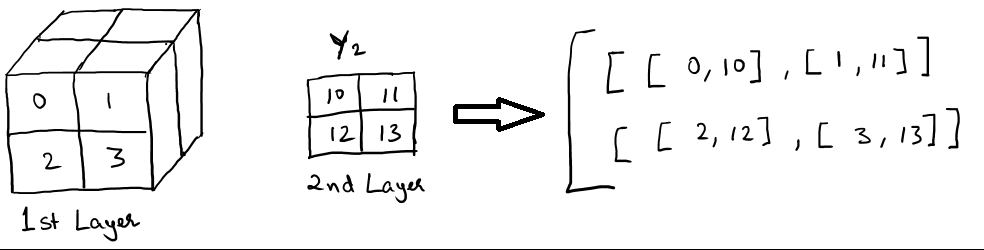

In [56]:
img('img5.png')

In [57]:
np.dstack([x2,y2])

array([[[ 0, 10],
        [ 1, 11]],

       [[ 2, 12],
        [ 3, 13]]])

In [58]:
np.dstack([x2,y2]).shape

(2, 2, 2)

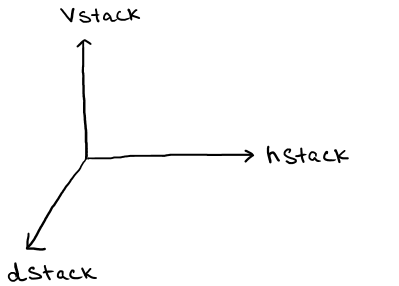

In [59]:
img('img6.png')

## Splitting arrays:

In [60]:
x1 = np.arange(10)
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
np.split(x1,2)

## Will get splitted into 2 equal parts

[array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9])]

In [62]:
y1 = np.arange(11)
np.split(y1,2)

## will give error because 11 elements cannot be splitted into 2 equal parts
## So we will use array_split to divide into unequal parts:

ValueError: array split does not result in an equal division

In [63]:
np.array_split(y1,2)

## It will get divided into 6 and 5
## 1st part will have more elements

[array([0, 1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10])]

#### We can also specify index while splitting to split based on position

## Other useful functions of numpy:
- **linspace**: to create number between two numbers
- **np.eig**: to get eigen values and eigen vectors. Used in PCA
- **regularstack**
- **block**

## Splitting based on position:

In [64]:
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
np.array_split(x1,(2,4))

[array([0, 1]), array([2, 3]), array([4, 5, 6, 7, 8, 9])]

- (2,4) means have a cut at index = 2(don't include 2) and have a cut at index = 4(don't include 4)
- IT splits based on position and not in equal parts

In [66]:
np.array_split(x1,(2,4,8))

[array([0, 1]), array([2, 3]), array([4, 5, 6, 7]), array([8, 9])]

- first cut at index = 2 --> go till 2 but don't include 2
- second cut at index = 4 --> go till 4 but don't include 4
- third cut at index = 8 --> go till 8 but don't include 8